# Défi AIF - code statistiques descriptives

In [40]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import mca
from mca import MCA

from statsmodels.graphics.mosaicplot import mosaic

## Chargement des données

In [37]:
requests=pd.read_csv("data.csv",sep=",",header=0)
requests.index=requests['hotel_id']
requests=requests.drop(['Unnamed: 0'], axis=1)
requests=requests.drop(['Unnamed: 0.1'], axis=1)
requests=requests.drop(['Unnamed: 0.1.1'], axis=1)
requests=requests.drop(['Unnamed: 0.1.1.1'], axis=1)
requests=requests.drop(['index'], axis=1)
requests=requests.drop(['hotel_id'],axis=1)
requests.head()

,group,brand,city,parking,pool,children_policy,price,stock,date,language,mobile,avatar_name
hotel_id,,,,,,,,,,,,
917,Morriott International,Corlton,amsterdam,1,1,0,366,14,10,austrian,0,laulau
101,Accar Hotels,Safitel,amsterdam,1,0,0,359,10,10,austrian,0,laulau
762,Yin Yang,Ardisson,amsterdam,1,1,0,193,10,10,austrian,0,laulau
140,Boss Western,Boss Western,amsterdam,0,0,0,205,4,10,austrian,0,laulau
256,Accar Hotels,Ibas,amsterdam,1,0,0,86,0,10,austrian,0,laulau


## Some descriptive statistics

### Study of the variable "parking"

1 si l'hotel dispose d'un parking payant, 0 sinon

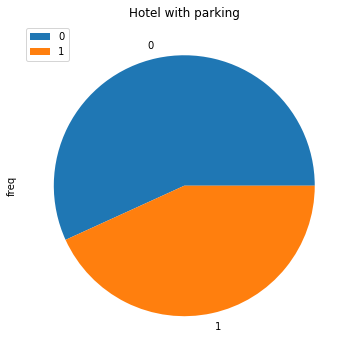

In [16]:
t = pd.crosstab(requests["parking"], "freq")
t.plot.pie(subplots=True,figsize=(6,6))
plt.legend(loc="upper left")
plt.title("Hotel with parking")
plt.show()

### Study of the variable "pool"

1 si l'hotel dispose d'une piscine payante, 0 sinon

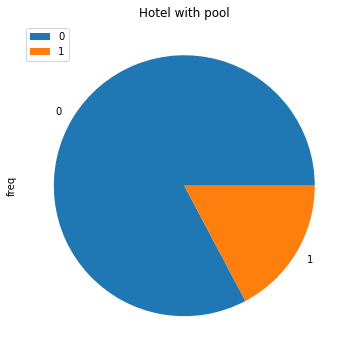

In [17]:
t = pd.crosstab(requests["pool"], "freq")
t.plot.pie(subplots=True,figsize=(6,6))
plt.legend(loc="upper left")
plt.title("Hotel with pool")
plt.show()

### Study of the variable "children policy"

2 si l'hôtel interdit les enfants de moins de 18 ou 21 ans, 
1 si l'hôtel interdit les enfants de moins de 12 ans, 
0 sinon

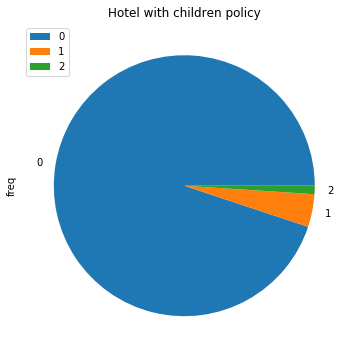

In [18]:
t = pd.crosstab(requests["children_policy"], "freq")
t.plot.pie(subplots=True,figsize=(6,6))
plt.legend(loc="upper left")
plt.title("Hotel with children policy")
plt.show()

### Study of the hotels price

In [54]:
print("prix moyen :", requests["price"].mean())

prix moyen : 161.99369511898297


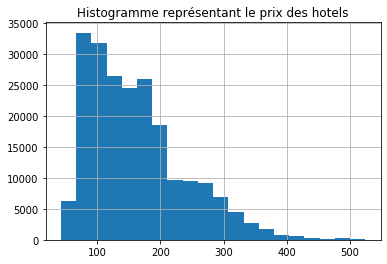

In [57]:
requests["price"].hist(bins=20)
plt.title("Histogramme représentant le prix des hotels")
plt.show()

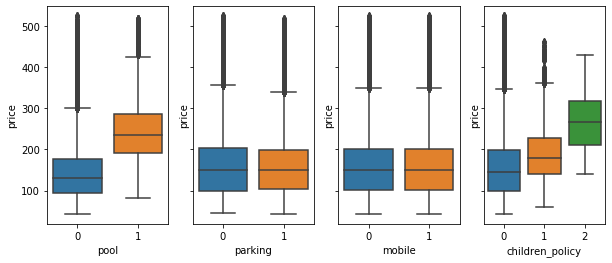

In [56]:
_, axes = plt.subplots(1, 4, sharey=True, figsize=(10, 4))
sns.boxplot(x='pool', y='price', data=requests,ax=axes[0])
sns.boxplot(x='parking', y='price', data=requests,ax=axes[1])
sns.boxplot(x='mobile', y='price', data=requests,ax=axes[2])
sns.boxplot(x='children_policy', y='price', data=requests,ax=axes[3])

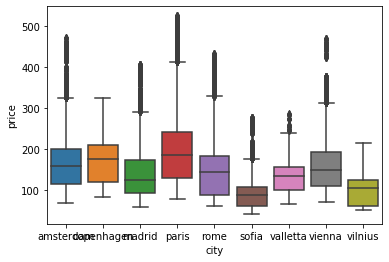

In [50]:
sns.boxplot(x='city', y='price', data=requests)

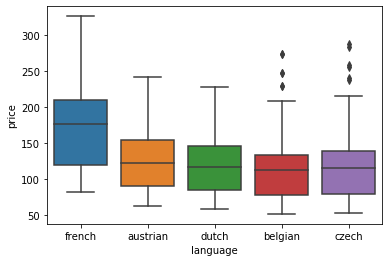

In [14]:
sns.boxplot(x='language', y='price', data=requests)

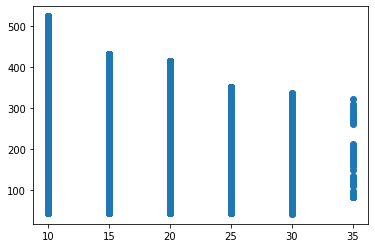

In [44]:
#pas incroyable
plt.scatter(requests['date'], requests['price'])
#plt.axis([0, 30,0, 350])

## AFCM (Analyse Factorielle des Correspondances Multiples)

In [36]:
# on travaille ici sur des données plus petites car s'il y en a trop on a pas assez d'espace pour tout stocker
# ça permet tout de même de donner une idée des liens entre les différentes variables
requests=pd.read_csv("laulau_data.csv",sep=",",header=0)
requests.index=requests['hotel_id']
requests=requests.drop(['Unnamed: 0'], axis=1)
requests=requests.drop(['index'], axis=1)
requests=requests.drop(['hotel_id'],axis=1)
requests.head()

,group,brand,city,parking,pool,children_policy,price,stock,date,language,mobile,avatar_name
hotel_id,,,,,,,,,,,,
519,Yin Yang,Royal Lotus,copenhagen,0,0,0,208,68,30,french,0,laulau
523,Independant,Independant,copenhagen,0,0,0,85,41,30,french,0,laulau
898,Yin Yang,8 Premium,copenhagen,1,0,0,86,24,30,french,0,laulau
770,Morriott International,Morriot,copenhagen,1,1,0,210,73,30,french,0,laulau
562,Chillton Worldwide,Quadrupletree,copenhagen,0,0,0,215,74,30,french,0,laulau


In [31]:
# on transforme le prix de l'hotel en variables catégorielle à l'aide des quantiles d'ordre 0.33 et 0.66
quant_price=np.quantile(requests['price'],[0.33,0.66])
data_afcm=requests.assign(categ_price="medium_price")
data_afcm.loc[data_afcm.price<=quant_price[0],'categ_price']='low_price'
data_afcm.loc[data_afcm.price>=quant_price[1],'categ_price']='high_price'
data_afcm=data_afcm.drop(['price'], axis=1)

quant_stock=np.quantile(requests['stock'],[0.33,0.66])
data_afcm=data_afcm.assign(categ_stock="medium_stock")
data_afcm.loc[data_afcm.stock<=quant_stock[0],'categ_stock']='low_stock'
data_afcm.loc[data_afcm.stock>=quant_stock[1],'categ_stock']='high_stock'
data_afcm=data_afcm.drop(['stock'], axis=1)


quant_date=np.quantile(requests['date'],[0.33,0.66])
data_afcm=data_afcm.assign(categ_date="medium_date")
data_afcm.loc[data_afcm.date<=quant_date[0],'categ_date']='near_date'
data_afcm.loc[data_afcm.date>=quant_date[1],'categ_date']='far_date'
data_afcm=data_afcm.drop(['date'], axis=1)

data_afcm=data_afcm.drop(['group'], axis=1)
data_afcm=data_afcm.drop(['brand'], axis=1)
data_afcm=data_afcm.drop(['avatar_name'], axis=1)

data_afcm["categ_price"]=pd.Categorical(data_afcm["categ_price"],ordered=False)
#data_afcm["categ_stock"]=pd.Categorical(data_afcm["categ_stock"],ordered=False)
data_afcm["categ_date"]=pd.Categorical(data_afcm["categ_date"],ordered=False)
data_afcm["parking"]=pd.Categorical(data_afcm["parking"],ordered=False)
data_afcm["pool"]=pd.Categorical(data_afcm["pool"],ordered=False)
data_afcm["children_policy"]=pd.Categorical(data_afcm["children_policy"],ordered=False)
data_afcm["language"]=pd.Categorical(data_afcm["language"],ordered=False)
data_afcm["mobile"]=pd.Categorical(data_afcm["mobile"],ordered=False)
data_afcm["city"]=pd.Categorical(data_afcm["city"],ordered=False)

data_afcm

,index,hotel_id,city,parking,pool,children_policy,language,mobile,categ_price,categ_stock,categ_date
hotel_id,,,,,,,,,,,
519,519,519,copenhagen,0,0,0,french,0,high_price,high_stock,far_date
523,523,523,copenhagen,0,0,0,french,0,low_price,low_stock,far_date
898,898,898,copenhagen,1,0,0,french,0,low_price,low_stock,far_date
770,770,770,copenhagen,1,1,0,french,0,high_price,high_stock,far_date
562,562,562,copenhagen,0,0,0,french,0,high_price,high_stock,far_date
...,...,...,...,...,...,...,...,...,...,...,...
498,498,498,vilnius,0,0,0,czech,1,medium_price,low_stock,far_date
516,516,516,vilnius,1,0,2,czech,1,high_price,high_stock,far_date
187,187,187,vilnius,1,1,0,czech,1,high_price,high_stock,far_date


In [32]:
dc=pd.DataFrame(pd.get_dummies(data_afcm))
dc.head()

,index,hotel_id,city_copenhagen,city_madrid,city_valletta,city_vilnius,parking_0,parking_1,pool_0,pool_1,...,language_french,mobile_0,mobile_1,categ_price_high_price,categ_price_low_price,categ_price_medium_price,categ_stock_high_stock,categ_stock_low_stock,categ_stock_medium_stock,categ_date_far_date
hotel_id,,,,,,,,,,,,,,,,,,,,,
519,519,519,1,0,0,0,1,0,1,0,...,1,1,0,1,0,0,1,0,0,1
523,523,523,1,0,0,0,1,0,1,0,...,1,1,0,0,1,0,0,1,0,1
898,898,898,1,0,0,0,0,1,1,0,...,1,1,0,0,1,0,0,1,0,1
770,770,770,1,0,0,0,0,1,0,1,...,1,1,0,1,0,0,1,0,0,1
562,562,562,1,0,0,0,1,0,1,0,...,1,1,0,1,0,0,1,0,0,1


In [33]:
mcaFic=MCA(dc,benzecri=False)

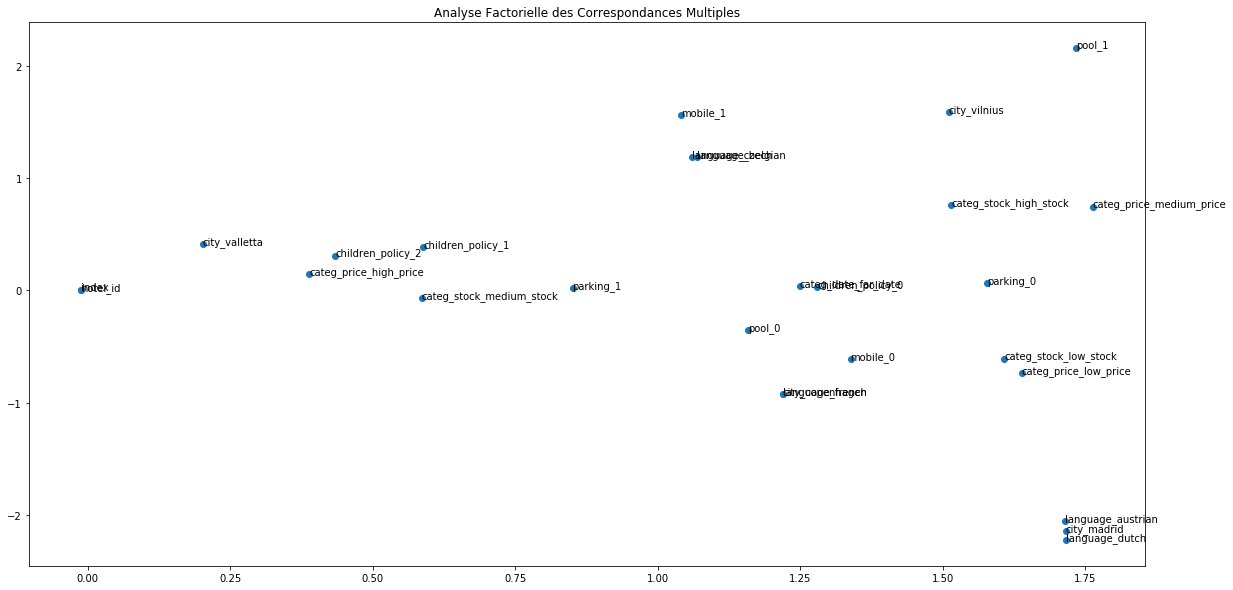

In [34]:
fig = plt.figure(1, figsize=(20, 10))
plt.scatter(mcaFic.fs_c()[:, 0],mcaFic.fs_c()[:, 1])
for i, j, nom in zip(mcaFic.fs_c()[:, 0],mcaFic.fs_c()[:, 1], dc.columns):
       plt.text(i, j, nom)
plt.title("Analyse Factorielle des Correspondances Multiples")
plt.show()